<a href="https://colab.research.google.com/github/leviathan519/Swapsy/blob/main/Image_Segmentation_using_machine_learning_1_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [3]:
from google.colab import files
files = files.upload()

Saving sandstone_train_images.tif to sandstone_train_images.tif


In [4]:
img = cv2.imread("sandstone_train_images.tif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
#Here, if you have multichannel image then extract the right channel instead of converting the image to grey.
#For example, if DAPI contains nuclei information, extract the DAPI channel image first.

#Multiple images can be used for training. For that, you need to concatenate the data

#Save original image pixels into a data frame. This is our Feature #1.

In [7]:
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

In [8]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
                kernels.append(kernel)
                #Now filter the image and add values to a new column
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [9]:
########################################
#Gerate OTHER FEATURES and add them to the data frame
edges = cv2.Canny(img,100,200)
edges1 = edges.reshape(-1)
df['Canny Filter'] = edges1

In [11]:
from skimage.filters import roberts,sobel,scharr,prewitt

In [13]:
#SOBEL
sobel =sobel(img)
edge_sobel = sobel.reshape(-1)
df['sobel'] = edge_sobel

In [ ]:
df.drop(edge_roberts,axis=1,inplace=True)

In [31]:
#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1


In [32]:
#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

In [33]:
#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

In [34]:
#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3


In [35]:
#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1


In [36]:
#Now, add a column in the data frame for the Labels
#For this, we need to import the labeled image
from google.colab import files
files = files.upload()

Saving sandstone_partial_labels_from_APEER_ML.tif to sandstone_partial_labels_from_APEER_ML.tif


In [39]:
labeled_img = cv2.cvtColor(cv2.imread('sandstone_partial_labels_from_APEER_ML.tif'),cv2.COLOR_BGR2GRAY)

In [40]:
#adding another column
df['Labels']= labeled_img.reshape(-1)

In [41]:
train_data = df.drop('Labels',axis=1)

In [42]:
df = df[df.Labels != 0]


In [43]:
#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values


In [45]:
#Encode Y values to 0, 1, 2, 3, .... (NOt necessary but makes it easy to use other tools like ROC plots)
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)

In [46]:
X = df.drop('Labels',axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [49]:
# Import the model we are using
#RandomForestRegressor is for regression type of problems.
#For classification we use RandomForestClassifier.
#Both yield similar results except for regressor the result is float
#and for classifier it is an integer.
from sklearn.ensemble import RandomForestClassifier

In [50]:
random = RandomForestClassifier(n_estimators=25,random_state=42)

In [51]:
random.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

In [53]:
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.
feature_list = list(X.columns)
feature_imp = pd.Series(random.feature_importances_,index = feature_list).sort_values(ascending=False)
print(feature_imp)

Gaussian s3       0.198969
Median s3         0.168447
Original Image    0.119107
Gaussian s7       0.068272
Gabor4            0.053898
Gabor6            0.053816
Gabor3            0.053253
Gabor5            0.049036
Gabor23           0.040918
Gabor21           0.032367
Gabor7            0.026937
sobel             0.018052
Gabor11           0.017157
Prewitt           0.016709
Gabor24           0.015707
Scharr            0.012962
roberts           0.010666
Gabor30           0.008324
Canny Filter      0.005992
Gabor29           0.005447
Gabor8            0.004682
Gabor32           0.004656
Gabor31           0.004648
Gabor12           0.003544
Gabor22           0.002433
Gabor28           0.002297
Gabor27           0.001419
Gabor20           0.000266
Gabor19           0.000014
Gabor14           0.000003
Gabor13           0.000002
Gabor25           0.000000
Gabor26           0.000000
Gabor1            0.000000
Gabor18           0.000000
Gabor17           0.000000
Gabor16           0.000000
G

In [ ]:
#SVM
# Train the Linear SVM to compare against Random Forest
#SVM will be slower than Random Forest.
#Make sure to comment out Fetaure importances lines of code as it does not apply to SVM.

In [54]:
from sklearn.svm import LinearSVC
model2 = LinearSVC(max_iter=100)
model2.fit(X_train,Y_train)

LinearSVC(max_iter=100)

In [56]:
#Test prediction on testing data.
prediction_RF = random.predict(X_test)
prediction_SVM = model2.predict(X_test)

In [57]:
#.predict just takes the .predict_proba output and changes everything
#to 0 below a certain threshold (usually 0.5) respectively to 1 above that threshold.
#In this example we have 4 labels, so the probabilities will for each label stored separately.
#
prediction_prob_test = random.predict_proba(X_test)


In [58]:
print(prediction_prob_test)

[[0.   1.   0.   0.  ]
 [0.   0.   0.   1.  ]
 [1.   0.   0.   0.  ]
 ...
 [0.24 0.6  0.16 0.  ]
 [0.   1.   0.   0.  ]
 [1.   0.   0.   0.  ]]


In [59]:
#Let us check the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.

In [61]:
print("Accuracy Score Random Forest:",metrics.accuracy_score(Y_test,prediction_RF))
print("Accuracy Score SVM:",metrics.accuracy_score(Y_test,prediction_SVM))

Accuracy Score Random Forest: 0.9632161165572444
Accuracy Score SVM: 0.9247234463530893


In [62]:
from yellowbrick.classifier import ROCAUC

In [63]:
#ROCAUC are used to measure predictive quality of classifier. the area under the cuerve is called AUC.
print("Classes in Image are",np.unique(Y))

Classes in Image are [0 1 2 3]


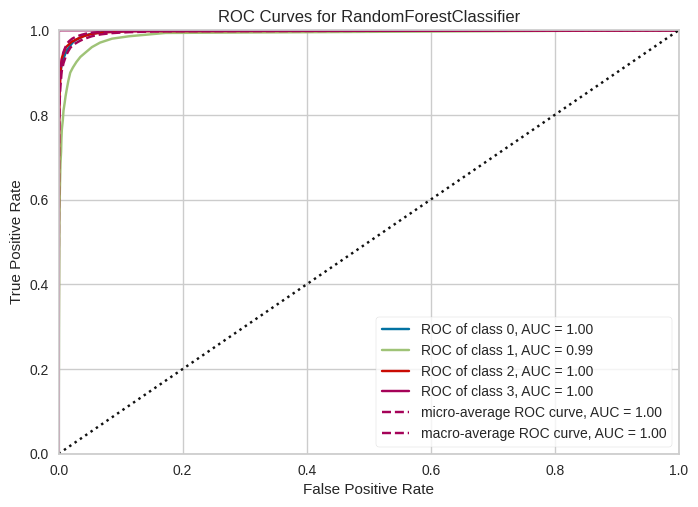

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [65]:
roc_auc = ROCAUC(random,classes= [0,1,2,3])
roc_auc.fit(X_train,Y_train)
roc_auc.score(X_test,Y_test)
roc_auc.show()

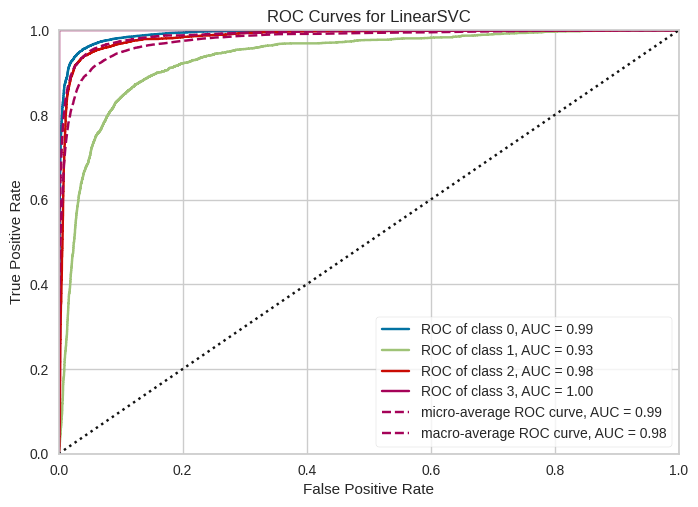

<Axes: title={'center': 'ROC Curves for LinearSVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [66]:
roc_auc = ROCAUC(model2,classes= [0,1,2,3])
roc_auc.fit(X_train,Y_train)
roc_auc.score(X_test,Y_test)
roc_auc.show()

In [67]:
############################################
#FOR RANDOM FOREST


#############################################

#MAKE PREDICTION
#You can store the model for future use. In fact, this is how you do machine elarning
#Train on training images, validate on test images and deploy the model on unknown images.

import pickle

In [69]:
#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(random, open(filename, 'wb'))


In [72]:
#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(train_data)

In [73]:
segmented = result.reshape(img.shape)

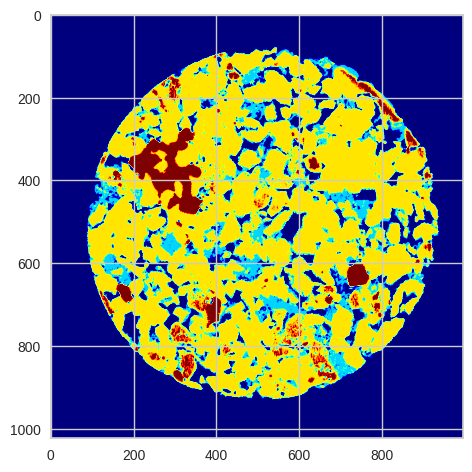

In [76]:
from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')